In [102]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV

In [103]:
X, y, coefficients = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=50,
    coef=True,
    random_state=1
)

0.7321024055979621


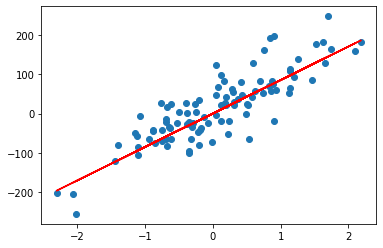

In [120]:
rr = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X, y)
print(rr.score(X, y))
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

b0 = tf.reduce_mean(tf.square(y-target-model_output))
b1 = tf.multiply(ridge_param, ridge_loss)
x = ridge_loss